In [1]:
import abfile.abfile as abf # works for python3
#import abfile as abf # works for python2
import numpy as np
import matplotlib.pyplot as plt
# from netCDF4 import Dataset
# import glob
from matplotlib import rc, rcParams

import cartopy.crs as ccrs
import cartopy.feature as cfeature

#plt.style.use('ggplot') # new added
%run my_functions.py
%run my_functions2.py


In [ ]:
# !conda install numpy -y

# overlay try

In [ ]:
#pathgrd = '/home/annettes/data/annettes/FRASIL/Topography/'
pathgrd = '/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/topo/'
grdname = pathgrd + 'regional.grid.a'
grdfile = abf.ABFileGrid(grdname,"r")
plon=grdfile.read_field('plon')
plat=grdfile.read_field('plat')
scpx=grdfile.read_field('scpx')
scpy=grdfile.read_field('scpy')
reso = (scpy +scpx)/2000 # (average grid size in km) #*thick[j,i]
idm,jdm=plon.shape
# grdfile.close()

topo_file1='/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/topo/depth_INDa0.12_01.a'
tf=abf.AFile(jdm,idm,topo_file1,"r")
topo1=tf.read_record(0)
topo1[np.where(topo1>50)]=np.nan
topo1[np.where(topo1<50)]=np.nan

topo1=tf.read_record(0)

tf.close()


# ax=TropicalIndian_Map2()
# ax.contourf(reso)#,transform=ccrs.PlateCarree()) # SouthPolarStereo()) 
# ax.plt.colorbar()
# ax.coastlines()
# # ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# ax.pcolormesh(topo1)


# plt.coastlines(resolution='50m', color='gray')

# plt.pcolormesh(topo1,alpha=1)
# plt.contourf(reso);plt.colorbar()

ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=90.0))
# # ax.set_extent([-40, 120, -75, 30],ccrs.PlateCarree()) 
# ax.contourf(topo1,alpha=0.5)
ax.coastlines(resolution='50m', color='gray')
ax.pcolormesh(reso);ax.colorbar()

plt.savefig('resolution_plot_TRY.jpg',bbox_inches='tight',dpi=900)


AttributeError: 'GeoAxesSubplot' object has no attribute 'colorbar'

In [ ]:


pathgrd = '/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/topo/'
grdname = pathgrd + 'regional.grid.a'
grdfile = abf.ABFileGrid(grdname,"r")
plon=grdfile.read_field('plon')
plat=grdfile.read_field('plat')
scpx=grdfile.read_field('scpx')
scpy=grdfile.read_field('scpy')
reso = (scpy +scpx)/2000 # (average grid size in km) #*thick[j,i]
idm,jdm=plon.shape
# grdfile.close()

ax=India_Map()
ax[1].contourf(plon,plat,np.log(reso),50,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# plt.pcolormesh(reso);plt.colorbar()



In [ ]:
fig,ax,proj=India_Map()
pxy = proj.transform_points(ccrs.PlateCarree(),plon,plat);px=pxy[:,:,0];py=pxy[:,:,1];
plt.pcolormesh(px,py,mresolution); plt.colorbar(shrink=0.8)

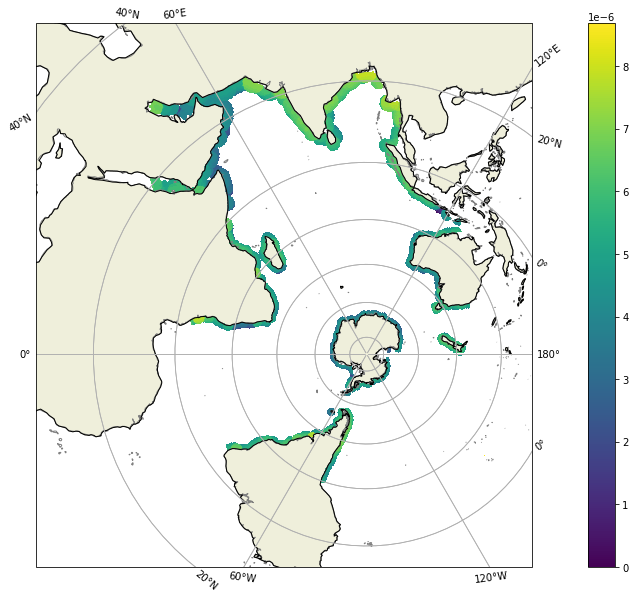

In [8]:
#river_file_0='/home/annettes/data/annettes/Jupyter/Rivers/031/rivers.a'
# # ERA-I # river_file_0='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/old_force/forcing.rivers.a' # This is erai-forced rivers
river_file_0='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/forcing.rivers.012.a' # This is era5-forced rivers
month=7
rf=abf.AFile(jdm,idm,river_file_0,"r")
river0=rf.read_record(month-1)
river0[np.where(river0==0)]=np.nan
river0[np.where(river0<=0)]=np.nan
river0[np.where(plon>179)]=np.nan
rf.close()

reso = (scpy +scpx)/2000 

ax=India_Map()
ax[1].contourf(plon,plat,np.log(river0),50,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(river0);plt.colorbar()
#plt.colorbar(np.log(river0))

#cbar = plt.colorbar(rf, orientation="horizontal") 
#cbar.set_label('River run-off (m)', fontsize=20) # mg.m$^{-3}$'
#plt.title('', fontsize=20);

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#plt.savefig('rivers_era5.jpg',bbox_inches='tight',dpi=900)
plt.savefig('rivers_era5_012.jpg',bbox_inches='tight',dpi=900)
#plt.savefig('rivers.pdf')
#plt.savefig('rivers.eps', format='eps')
#plt.savefig('rivers.png', bbox_inches='tight') # only use if any unwanted white-spaces (margins) appeared in saved image

#fig.savefig('rivers.tiff', format='tiff', dpi=1200) # to save plot in high-resolution
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#fig = plt.figure(figsize=[12,10])
#ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-90.0))
#ax.add_feature(cfeature.COASTLINE)

#plt.pcolormesh(river0,vmin=0,vmax=0.000001);plt.colorbar()
#plt.show()
#plt.contourf(np.log(river0));plt.colorbar()


#ax=Arctic_Map()
#ax[1].contourf(plon,plat,np.log(river0), vmin=-20,vmax=-9,transform=ccrs.PlateCarree());


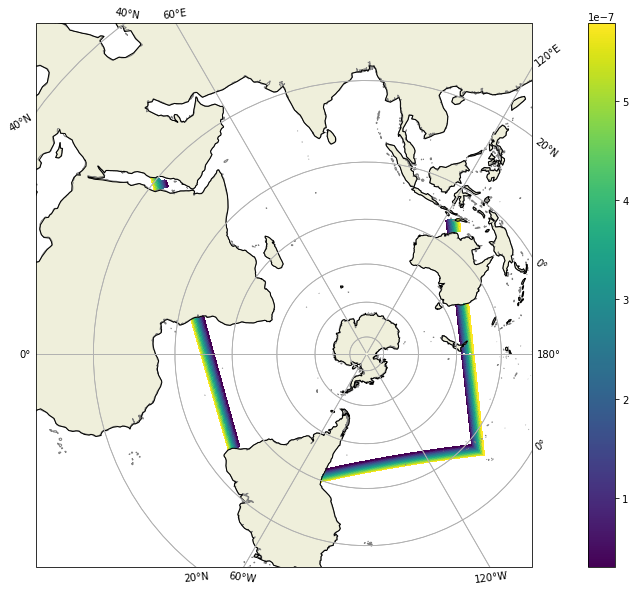

In [17]:
# Plotting rmu relaxation 
rmu_file_0='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/relax_rmu_010.a' # Relaxation file
rf=abf.AFile(jdm,idm,rmu_file_0,"r")
rmu=rf.read_record(0)
rmu[np.where(plon>179.5)]=np.nan
rmu[np.where(plon<-179.5)]=np.nan
rmu[np.where(rmu==0)]=np.nan
rf.close()

ax=India_Map()
ax[1].pcolormesh(plon,plat,rmu,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005 #np.log()
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(rmu);plt.colorbar()
#plt.show()

#plt.savefig('relax_rmu_010.jpg',bbox_inches='tight',dpi=900)

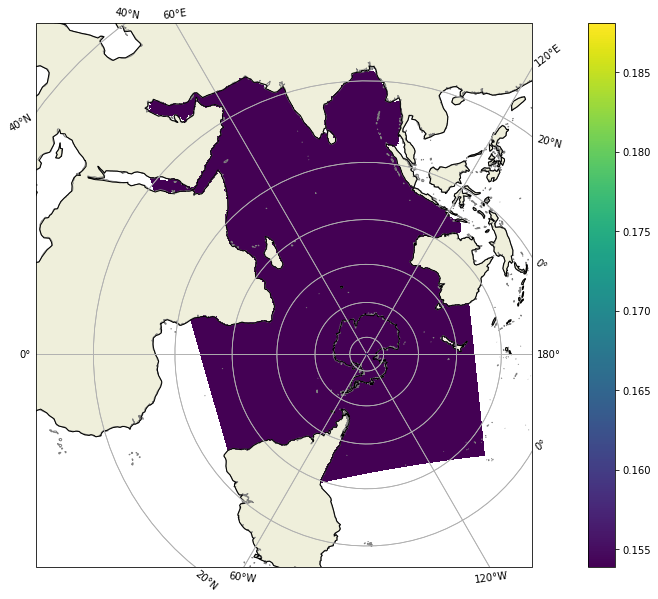

In [27]:
# Plotting sal relaxation 
sal_file_0='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/relax_sal_010.a' # Relaxation file
rf=abf.AFile(jdm,idm,sal_file_0,"r")
sal=rf.read_record(0)
sal[np.where(plon>179.5)]=np.nan
sal[np.where(plon<-179.5)]=np.nan
sal[np.where(sal==0)]=np.nan
rf.close()

ax=India_Map()
ax[1].pcolormesh(plon,plat,sal,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005 #np.log()
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(sal);plt.colorbar()

plt.savefig('relax_sal_010.jpg',bbox_inches='tight',dpi=900)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/akash/.local/lib/python3.8/site-packages/matplotlib/colors.py:1019: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


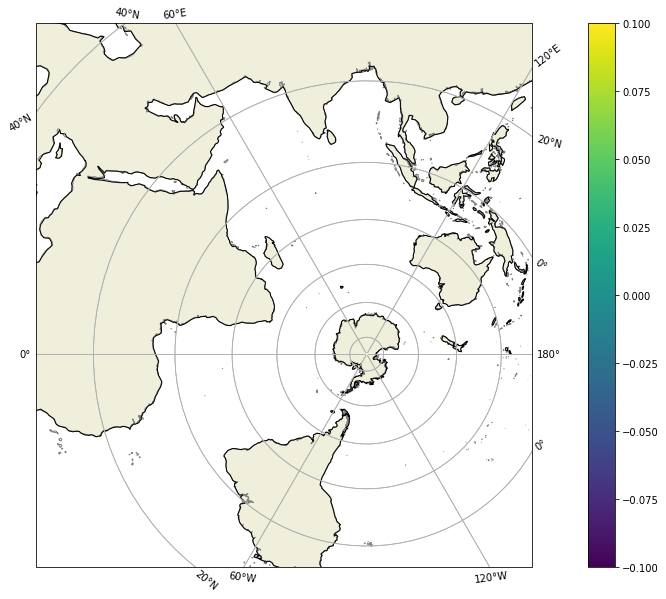

In [26]:
# Plotting tem relaxation 
tem_file_0='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/relax_tem_010.a' # Relaxation file
rf=abf.AFile(jdm,idm,tem_file_0,"r")
tem=rf.read_record(0)
tem[np.where(plon>179.5)]=np.nan
tem[np.where(plon<-179.5)]=np.nan
tem[np.where(tem==0)]=np.nan
rf.close()

ax=India_Map()
ax[1].pcolormesh(plon,plat,tem,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005 #np.log()
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(tem);plt.colorbar()

plt.savefig('relax_tem_010.jpg',bbox_inches='tight',dpi=900)

/home/akash/.local/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


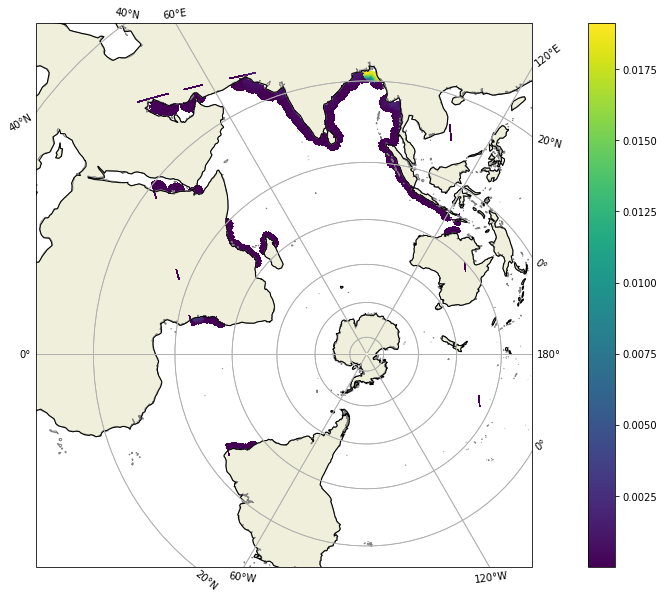

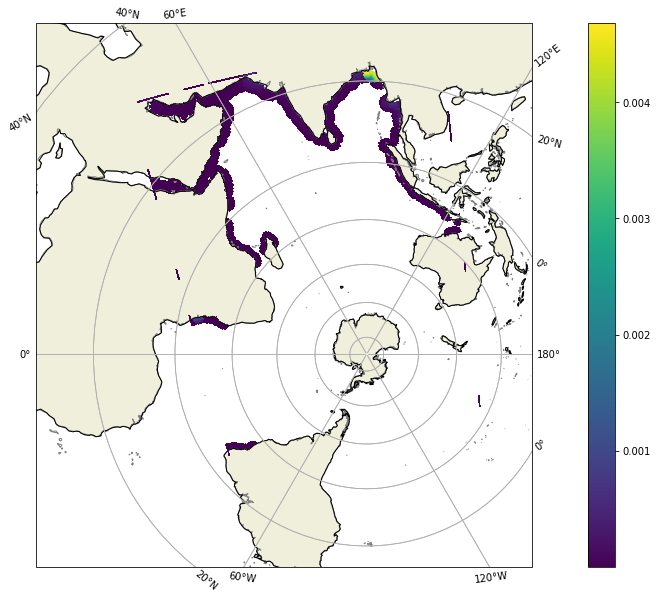

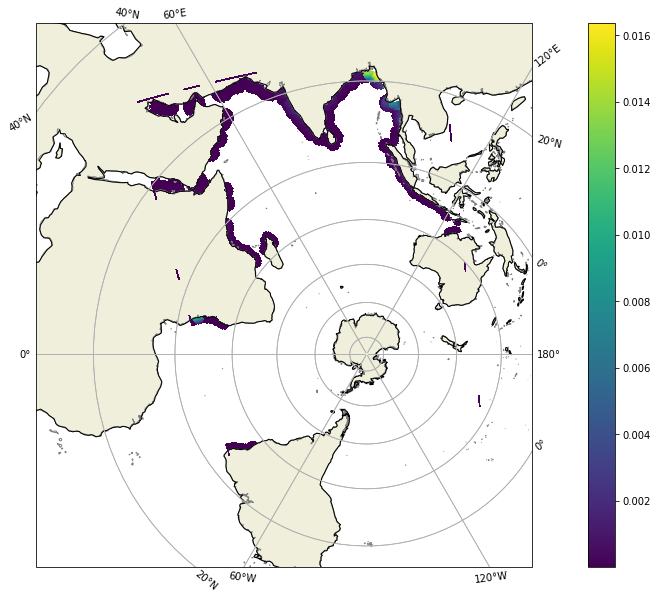

In [7]:
#nutrients 

no3_file_0='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/ECO_no3.a'
pho_file_1='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/ECO_pho.a'
sil_file_2='/media/akash/FA22E72622E6E69B/DATA1_disk/1_NERCI_WORKS/2_MODELLING/HYCOM_ECOSMO/compare_relax_forcing/ECO_sil.a'

month=7


rf=abf.AFile(jdm,idm,no3_file_0,"r")
no3=rf.read_record(month-1)
no3[np.where(plon>179)]=np.nan
no3[np.where(no3==0)]=np.nan
rf.close()

ax=India_Map()
ax[1].pcolormesh(plon,plat,no3,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005 #np.log()
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(no3);plt.colorbar()

plt.savefig('ECO_no3_012.jpg',bbox_inches='tight',dpi=900)

rf=abf.AFile(jdm,idm,pho_file_1,"r")
pho=rf.read_record(month-1)
pho[np.where(plon>179)]=np.nan
pho[np.where(pho==0)]=np.nan
rf.close()

ax=India_Map()
ax[1].pcolormesh(plon,plat,pho,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005 #np.log()
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(pho);plt.colorbar()

plt.savefig('ECO_pho_012.jpg',bbox_inches='tight',dpi=900)


rf=abf.AFile(jdm,idm,sil_file_2,"r")
sil=rf.read_record(month-1)
sil[np.where(plon>179)]=np.nan
sil[np.where(sil==0)]=np.nan
rf.close()

ax=India_Map()
ax[1].pcolormesh(plon,plat,sil,transform=ccrs.PlateCarree()) # SouthPolarStereo())  #vmin=0,vmax=0.0000005 #np.log()
ax[1].coastlines()
ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.pcolormesh(sil);plt.colorbar()

plt.savefig('ECO_sil_012.jpg',bbox_inches='tight',dpi=900)


In [ ]:
#plt.contourf(river,vmin=0,vmax=0.000001);plt.colorbar()
ax=Arctic_Map()
ax[1].contourf(plon,plat,np.log(river0), vmin=-20,vmax=-9,transform=ccrs.PlateCarree());

ax=Arctic_Map()
ax[1].contourf(plon,plat,np.log(river1), vmin=-20,vmax=-9,transform=ccrs.PlateCarree());

ax=Arctic_Map()
ax[1].contourf(plon,plat,np.log(river2), vmin=-20,vmax=-9,transform=ccrs.PlateCarree());


In [1]:
#plt.contourf(river,vmin=0,vmax=0.000001);plt.colorbar()
ax=Arctic_Map()
ax[1].contourf(plon,plat,np.log(river2), vmin=-20,vmax=-9,transform=ccrs.PlateCarree());


NameError: name 'Arctic_Map' is not defined

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()


NameError: name 'plt' is not defined

# THE CODE ENDS HERE 

In [ ]:
# THIS is not part of the HYCOM
# JUst storing some useful plot customise options from Wekeo-copernicus course

fig2 = plt.figure(figsize=(20, 20), dpi=300)
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(LON_subset,LAT_subset,np.ma.masked_invalid(CHL_subset), shading='flat', vmin=np.log10(0.01), vmax=np.log10(50), cmap=plt.cm.viridis)  
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('OLCI [CHL_NN] mg.m$^{-3}$', fontsize=20);
plt.show()

In [ ]:
# This section is to rotate the saved figure
from PIL import Image
#read the image
fig = Image.open("rivers_era5.jpg");
#rotate image
out = fig.rotate(180);out.save('rivers_era5.jpg')
fig2 = Image.open("rivers_era5.jpg")
fig3 = fig2.resize((400, 400))
fig3

In [1]:


## THIS IS A TEST , NOT PART OF HYCOM

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
import scipy.stats as st

def make_cloud(x, y, std, n=100):
    x = np.random.normal(x, std, n)
    y = np.random.normal(y, std, n)
    return np.array(zip(x, y))

def contour_cloud(x, y, cmap):
    xmin, xmax = -4, 4
    ymin, ymax = -4, 4

    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    plt.contourf(xx, yy, f, cmap=cmap, alpha=0.5)
    
    

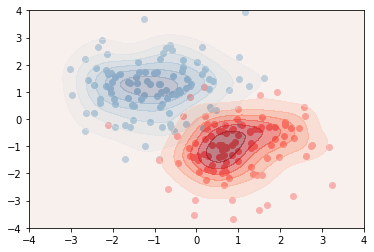

In [2]:
cloud1 = make_cloud(-1, 1, 1)
cloud2 = make_cloud(1, -1, 1)

plt.scatter(x=cloud1[:,0], y=cloud1[:,1])
plt.scatter(x=cloud2[:,0], y=cloud2[:,1], color='red')

fig = plt.gcf()
ax = plt.gca()

contour_cloud(x=cloud1[:, 0], y=cloud1[:, 1], cmap=cm.Blues)
contour_cloud(x=cloud2[:, 0], y=cloud2[:, 1], cmap=cm.Reds)